# 해결문제

1. 엑셀파일에서 학생 20명의 5과목 점수 부여
2. 첫번째 컬럼은 학생이름이고 나머지 5칸은 과목이름
3. 엑셀을 python을 읽음
4. 학생들의 합계와 평균을 마지막 2칸에 추가
5. 마지막 행에 각 과목별 평균추가
6. 학생들의 등위를 맨 오른쪽 칸에 추가
7. 과목당 히스토그램
8. 각과목의 1등과 해당 학생의 전체 등수를 하나의 그래프로 표현
9. 각과목당 사분위를 구하고 박스plot
10. 추가된 내용을 새로운 엑셀 파일로 저장

In [1]:
#라이브러리 추가
import pandas as pd
import matplotlib.pyplot as plt

# 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

In [55]:
#엑셀을 python을 읽음 
df = pd.read_excel('C:/Users/user/work/성적.xlsx')
df

,성명,출석,퀴즈,중간,기말,기말과제
0,유효*,10,23.77,29,23,0
1,민준*,10,26.23,27,28,20
2,이상*,10,27.05,29,30,25
3,강기*,8,23.77,10,0,0
4,김현*,10,28.69,25,29,25
5,박성*,10,27.05,30,28,23
6,정철*,10,22.13,27,28,24
7,김우*,8,27.05,25,22,25
8,정수*,7,8.20,18,18,0
9,박태*,8,28.69,28,25,23


In [3]:
df_name = df['성명']
df_name

0     유효*
1     민준*
2     이상*
3     강기*
4     김현*
5     박성*
6     정철*
7     김우*
8     정수*
9     박태*
10    류리*
11    최연*
12    고정*
13    권오*
14    김동*
15    김성*
16    박희*
17    김예*
18    정원*
19    김민*
20    신영*
21    장쯔*
22    판항*
23    구정*
Name: 성명, dtype: object

In [4]:
type(df_name)

pandas.core.series.Series

In [8]:
df_name[1:3]

1    민준*
2    이상*
Name: 성명, dtype: object

In [5]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.loc[1]

성명        민준*
출석         10
퀴즈      26.23
중간         27
기말         28
기말과제       20
Name: 1, dtype: object

In [15]:
pd.DataFrame(df.loc[1]).T

,성명,출석,퀴즈,중간,기말,기말과제
1,민준*,10,26.23,27,28,20


In [13]:
df.loc[1:3]

,성명,출석,퀴즈,중간,기말,기말과제
1,민준*,10,26.23,27,28,20
2,이상*,10,27.05,29,30,25
3,강기*,8,23.77,10,0,0


In [22]:
df2 = df.loc[:, ['성명','중간','기말']]
df2

,성명,중간,기말
0,유효*,29,23
1,민준*,27,28
2,이상*,29,30
3,강기*,10,0
4,김현*,25,29
5,박성*,30,28
6,정철*,27,28
7,김우*,25,22
8,정수*,18,18
9,박태*,28,25


In [26]:
df21 = df.iloc[1:5, [0,3,4]]
df21

,성명,중간,기말
1,민준*,27,28
2,이상*,29,30
3,강기*,10,0
4,김현*,25,29


In [27]:
df21 = df21.set_index('성명')
df21

,중간,기말
성명,,
민준*,27,28
이상*,29,30
강기*,10,0
김현*,25,29


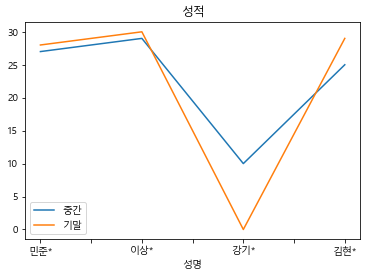

In [31]:

df21.plot()
plt.title('성적')
plt.show()

### 통계함수
```
데이터프레임.통계함수(axis옵션)
```
+ count() : NA 값을 제외한 값의 수를 반환 
+ min() : 최소
+ max() : 최대
+ sum() : 합계
+ mean() : 평균
+ describe() : 요약통계
+ quantile() : 0부터 1까지의 분위수 계산 
+ axis : 0-각 열별 통계, 1-각 행별 통계

In [32]:
#학생들의 합계와 평균을 마지막 2칸에 추가 
df

,성명,출석,퀴즈,중간,기말,기말과제
0,유효*,10,23.77,29,23,0
1,민준*,10,26.23,27,28,20
2,이상*,10,27.05,29,30,25
3,강기*,8,23.77,10,0,0
4,김현*,10,28.69,25,29,25
5,박성*,10,27.05,30,28,23
6,정철*,10,22.13,27,28,24
7,김우*,8,27.05,25,22,25
8,정수*,7,8.20,18,18,0
9,박태*,8,28.69,28,25,23


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성명      24 non-null     object 
 1   출석      24 non-null     int64  
 2   퀴즈      24 non-null     float64
 3   중간      24 non-null     int64  
 4   기말      24 non-null     int64  
 5   기말과제    24 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.2+ KB


In [34]:
df.describe()

,출석,퀴즈,중간,기말,기말과제
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8.750000,22.234167,22.375000,18.541667,16.375000
std,2.171956,7.130125,8.155086,8.895427,10.479016
min,0.000000,1.640000,0.000000,0.000000,0.000000
25%,8.000000,22.130000,18.000000,12.000000,7.500000
50%,10.000000,24.180000,26.000000,19.000000,21.500000
75%,10.000000,27.050000,28.000000,25.750000,25.000000
max,10.000000,28.690000,30.000000,30.000000,25.000000


In [56]:
df['합계'] = df.sum(axis=1)

In [57]:
df['평균'] = df.mean(axis=1).round(2)

In [58]:
df

,성명,출석,퀴즈,중간,기말,기말과제,합계,평균
0,유효*,10,23.77,29,23,0,85.77,28.59
1,민준*,10,26.23,27,28,20,111.23,37.08
2,이상*,10,27.05,29,30,25,121.05,40.35
3,강기*,8,23.77,10,0,0,41.77,13.92
4,김현*,10,28.69,25,29,25,117.69,39.23
5,박성*,10,27.05,30,28,23,118.05,39.35
6,정철*,10,22.13,27,28,24,111.13,37.04
7,김우*,8,27.05,25,22,25,107.05,35.68
8,정수*,7,8.20,18,18,0,51.20,17.07
9,박태*,8,28.69,28,25,23,112.69,37.56


In [59]:
df.loc[len(df)] = df.mean().round(2)

In [60]:
df

,성명,출석,퀴즈,중간,기말,기말과제,합계,평균
0,유효*,10.00,23.77,29.00,23.00,0.00,85.77,28.59
1,민준*,10.00,26.23,27.00,28.00,20.00,111.23,37.08
2,이상*,10.00,27.05,29.00,30.00,25.00,121.05,40.35
3,강기*,8.00,23.77,10.00,0.00,0.00,41.77,13.92
4,김현*,10.00,28.69,25.00,29.00,25.00,117.69,39.23
5,박성*,10.00,27.05,30.00,28.00,23.00,118.05,39.35
6,정철*,10.00,22.13,27.00,28.00,24.00,111.13,37.04
7,김우*,8.00,27.05,25.00,22.00,25.00,107.05,35.68
8,정수*,7.00,8.20,18.00,18.00,0.00,51.20,17.07
9,박태*,8.00,28.69,28.00,25.00,23.00,112.69,37.56


In [54]:
df.iloc[24, 0] = '전체평균'
df.tail(2)

,성명,출석,퀴즈,중간,기말,기말과제,합계,평균
23,구정*,10.00,26.230000,28.000,13.000000,0.000,77.230000,25.740
24,전체평균,8.75,22.234167,22.375,18.541667,16.375,88.275833,29.425


### 순위 : .rank(옵션)
```
df['평균'].rank(ascending=False, method='min')
```
+ 평균열을 기준으로 내림차순 처리 동점인 경우는 공동처리

#### ascending 옵션
+ ascending=False : 내림차순

#### method 옵션
+ method=average : 동점처리
+ average(평균): 그룹의 평균 순위 부여 (예: 두 명이 공동 1등이라면 둘 다 1.5등으로 처리)
+ min(최솟값): 그룹에서 가장 낮은 순위 부여 (예: 두 명이 공동 1등이라면 둘 다 1등으로 처리)
+ max(최댓값): 그룹에서 가장 낮은 순위 부여 (예: 두 명이 공동 1등이라면 둘 다 2등으로 처리)
+ first(첫 번째): 그룹에서 표시되는 순서대로 순위 부여 (예: 두 명이 공동 1등이라면 순서가 빠른 사람을 1등으로 처리)
+ dense(밀도): min과 동일함. 다만 순위는 항상 1씩 증가

In [78]:
#학생들의 등위를 맨 오른쪽 칸에 추가 
dfrank = df.iloc[:24, :]
dfrank

,성명,출석,퀴즈,중간,기말,기말과제,합계,평균
0,유효*,10.0,23.77,29.0,23.0,0.0,85.77,28.59
1,민준*,10.0,26.23,27.0,28.0,20.0,111.23,37.08
2,이상*,10.0,27.05,29.0,30.0,25.0,121.05,40.35
3,강기*,8.0,23.77,10.0,0.0,0.0,41.77,13.92
4,김현*,10.0,28.69,25.0,29.0,25.0,117.69,39.23
5,박성*,10.0,27.05,30.0,28.0,23.0,118.05,39.35
6,정철*,10.0,22.13,27.0,28.0,24.0,111.13,37.04
7,김우*,8.0,27.05,25.0,22.0,25.0,107.05,35.68
8,정수*,7.0,8.20,18.0,18.0,0.0,51.20,17.07
9,박태*,8.0,28.69,28.0,25.0,23.0,112.69,37.56


In [84]:
dfrank['평균'].rank(ascending=False)

0     16.0
1      6.0
2      1.0
3     23.0
4      4.0
5      3.0
6      7.0
7      9.0
8     21.0
9      5.0
10    15.0
11    19.0
12    12.0
13     2.0
14    13.0
15    18.0
16    14.0
17    24.0
18    11.0
19    10.0
20     8.0
21    22.0
22    20.0
23    17.0
Name: 평균, dtype: float64

In [81]:
dfrank['순위'] = dfrank['평균'].rank(ascending=False).astype(int)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
dfrank

,성명,출석,퀴즈,중간,기말,기말과제,합계,평균,순위
0,유효*,10.0,23.77,29.0,23.0,0.0,85.77,28.59,16
1,민준*,10.0,26.23,27.0,28.0,20.0,111.23,37.08,6
2,이상*,10.0,27.05,29.0,30.0,25.0,121.05,40.35,1
3,강기*,8.0,23.77,10.0,0.0,0.0,41.77,13.92,23
4,김현*,10.0,28.69,25.0,29.0,25.0,117.69,39.23,4
5,박성*,10.0,27.05,30.0,28.0,23.0,118.05,39.35,3
6,정철*,10.0,22.13,27.0,28.0,24.0,111.13,37.04,7
7,김우*,8.0,27.05,25.0,22.0,25.0,107.05,35.68,9
8,정수*,7.0,8.20,18.0,18.0,0.0,51.20,17.07,21
9,박태*,8.0,28.69,28.0,25.0,23.0,112.69,37.56,5


In [69]:
#마지막 행에 각 과목별 평균추가 
dfrank['순위'] = dfrank['평균'].rank()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
dfrank.head(2)

,성명,출석,퀴즈,중간,기말,기말과제,합계,평균,순위
0,유효*,10.0,23.77,29.0,23.0,0.0,85.77,28.59,16
1,민준*,10.0,26.23,27.0,28.0,20.0,111.23,37.08,6


In [97]:
dfrank.columns

Index(['성명', '출석', '퀴즈', '중간', '기말', '기말과제', '합계', '평균', '순위'], dtype='object')

In [96]:
dfrank.columns = ['성명', '출석', '퀴즈', '중간', '기말', '기말과제', '합계', '평균', '순위']

In [100]:
dfrank.loc[:,'출석']

0     10.0
1     10.0
2     10.0
3      8.0
4     10.0
5     10.0
6     10.0
7      8.0
8      7.0
9      8.0
10     8.0
11     7.0
12    10.0
13    10.0
14    10.0
15     8.0
16    10.0
17     0.0
18    10.0
19    10.0
20    10.0
21     8.0
22     8.0
23    10.0
Name: 출석, dtype: float64

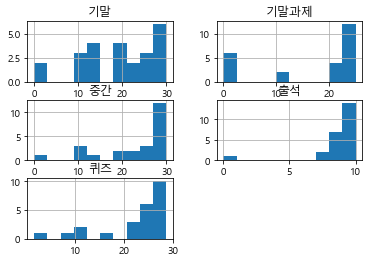

In [104]:
dfrank.loc[:,['출석','퀴즈', '중간', '기말', '기말과제']].hist()
plt.show()

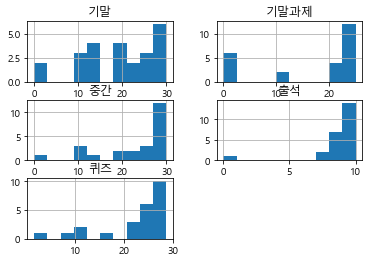

In [107]:
dfrank.hist(['출석','퀴즈', '중간', '기말', '기말과제'])
plt.show()

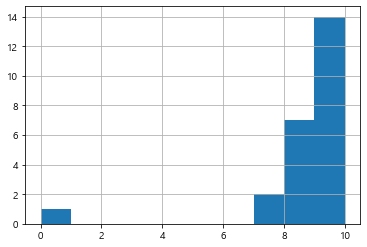

In [108]:
#과목당 히스토그램
dfrank.loc[:,'출석'].hist()
plt.show()

In [112]:
#각과목당 사분위를 구하고 박스plot
d1 = dfrank.describe()

In [114]:
d1.iloc[4:7, :]

,출석,퀴즈,중간,기말,기말과제,합계,평균,순위
25%,8.0,22.13,18.0,12.00,7.5,67.120,22.375,6.75
50%,10.0,24.18,26.0,19.00,21.5,100.550,33.515,12.50
75%,10.0,27.05,28.0,25.75,25.0,111.155,37.050,18.25


In [111]:
dfrank.quantile(.25) # 0부터 1까지의 분위수 계산
dfrank.quantile(.75)

출석       10.000
퀴즈       27.050
중간       28.000
기말       25.750
기말과제     25.000
합계      111.155
평균       37.050
순위       18.250
Name: 0.75, dtype: float64

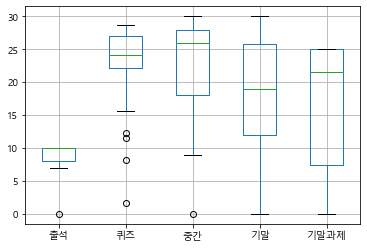

In [115]:
dfrank.boxplot(['출석','퀴즈', '중간', '기말', '기말과제'])
plt.show()

In [179]:
#각과목의 1등과 해당 학생의 전체 등수를 하나의 그래프로 표현

In [116]:
dfrank

,성명,출석,퀴즈,중간,기말,기말과제,합계,평균,순위
0,유효*,10.0,23.77,29.0,23.0,0.0,85.77,28.59,16
1,민준*,10.0,26.23,27.0,28.0,20.0,111.23,37.08,6
2,이상*,10.0,27.05,29.0,30.0,25.0,121.05,40.35,1
3,강기*,8.0,23.77,10.0,0.0,0.0,41.77,13.92,23
4,김현*,10.0,28.69,25.0,29.0,25.0,117.69,39.23,4
5,박성*,10.0,27.05,30.0,28.0,23.0,118.05,39.35,3
6,정철*,10.0,22.13,27.0,28.0,24.0,111.13,37.04,7
7,김우*,8.0,27.05,25.0,22.0,25.0,107.05,35.68,9
8,정수*,7.0,8.20,18.0,18.0,0.0,51.20,17.07,21
9,박태*,8.0,28.69,28.0,25.0,23.0,112.69,37.56,5


In [122]:
dfrank.columns

Index(['성명', '출석', '퀴즈', '중간', '기말', '기말과제', '합계', '평균', '순위', '출석순위'], dtype='object')

In [123]:
dfrank['출석순위'] = dfrank['출석'].rank(ascending=False, method='min').astype(int)
dfrank['퀴즈순위'] = dfrank['퀴즈'].rank(ascending=False, method='min').astype(int)
dfrank['중간순위'] = dfrank['중간'].rank(ascending=False, method='min').astype(int)
dfrank['기말순위'] = dfrank['기말'].rank(ascending=False, method='min').astype(int)
dfrank['기말과제순위'] = dfrank['기말과제'].rank(ascending=False, method='min').astype(int)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [124]:
dfrank

,성명,출석,퀴즈,중간,기말,기말과제,합계,평균,순위,출석순위,퀴즈순위,중간순위,기말순위,기말과제순위
0,유효*,10.0,23.77,29.0,23.0,0.0,85.77,28.59,16,1,13,2,10,19
1,민준*,10.0,26.23,27.0,28.0,20.0,111.23,37.08,6,1,8,10,4,13
2,이상*,10.0,27.05,29.0,30.0,25.0,121.05,40.35,1,1,5,2,1,1
3,강기*,8.0,23.77,10.0,0.0,0.0,41.77,13.92,23,15,13,22,23,19
4,김현*,10.0,28.69,25.0,29.0,25.0,117.69,39.23,4,1,1,13,2,1
5,박성*,10.0,27.05,30.0,28.0,23.0,118.05,39.35,3,1,5,1,4,11
6,정철*,10.0,22.13,27.0,28.0,24.0,111.13,37.04,7,1,17,10,4,8
7,김우*,8.0,27.05,25.0,22.0,25.0,107.05,35.68,9,15,5,13,11,1
8,정수*,7.0,8.20,18.0,18.0,0.0,51.20,17.07,21,22,23,18,13,19
9,박태*,8.0,28.69,28.0,25.0,23.0,112.69,37.56,5,15,1,6,7,11


In [125]:
dfrank.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성명      24 non-null     object 
 1   출석      24 non-null     float64
 2   퀴즈      24 non-null     float64
 3   중간      24 non-null     float64
 4   기말      24 non-null     float64
 5   기말과제    24 non-null     float64
 6   합계      24 non-null     float64
 7   평균      24 non-null     float64
 8   순위      24 non-null     int32  
 9   출석순위    24 non-null     int32  
 10  퀴즈순위    24 non-null     int32  
 11  중간순위    24 non-null     int32  
 12  기말순위    24 non-null     int32  
 13  기말과제순위  24 non-null     int32  
dtypes: float64(7), int32(6), object(1)
memory usage: 2.2+ KB


In [135]:
dfr = dfrank.iloc[:, [0, 8, 9, 10, 11, 12, 13]]
dfr

,성명,순위,출석순위,퀴즈순위,중간순위,기말순위,기말과제순위
0,유효*,16,1,13,2,10,19
1,민준*,6,1,8,10,4,13
2,이상*,1,1,5,2,1,1
3,강기*,23,15,13,22,23,19
4,김현*,4,1,1,13,2,1
5,박성*,3,1,5,1,4,11
6,정철*,7,1,17,10,4,8
7,김우*,9,15,5,13,11,1
8,정수*,21,22,23,18,13,19
9,박태*,5,15,1,6,7,11


In [136]:
dfrank.columns

Index(['성명', '출석', '퀴즈', '중간', '기말', '기말과제', '합계', '평균', '순위', '출석순위', '퀴즈순위',
       '중간순위', '기말순위', '기말과제순위'],
      dtype='object')

In [138]:
dfr = dfrank.loc[:, ['성명','순위','퀴즈순위', '중간순위', '기말순위', '기말과제순위' ]]
dfr

,성명,순위,퀴즈순위,중간순위,기말순위,기말과제순위
0,유효*,16,13,2,10,19
1,민준*,6,8,10,4,13
2,이상*,1,5,2,1,1
3,강기*,23,13,22,23,19
4,김현*,4,1,13,2,1
5,박성*,3,5,1,4,11
6,정철*,7,17,10,4,8
7,김우*,9,5,13,11,1
8,정수*,21,23,18,13,19
9,박태*,5,1,6,7,11


In [143]:
dfr2 = dfr[(dfr['퀴즈순위']==1) | (dfr['중간순위']==1)  | (dfr['기말순위']==1) | (dfr['기말과제순위']==1)]
dfr2

,성명,순위,퀴즈순위,중간순위,기말순위,기말과제순위
2,이상*,1,5,2,1,1
4,김현*,4,1,13,2,1
5,박성*,3,5,1,4,11
7,김우*,9,5,13,11,1
9,박태*,5,1,6,7,11
14,김동*,13,3,16,18,1
16,박희*,14,11,18,13,1
18,정원*,11,17,15,9,1
19,김민*,10,12,10,12,1


In [144]:
dfr2 = dfr2.set_index('성명')
dfr2

,순위,퀴즈순위,중간순위,기말순위,기말과제순위
성명,,,,,
이상*,1,5,2,1,1
김현*,4,1,13,2,1
박성*,3,5,1,4,11
김우*,9,5,13,11,1
박태*,5,1,6,7,11
김동*,13,3,16,18,1
박희*,14,11,18,13,1
정원*,11,17,15,9,1
김민*,10,12,10,12,1


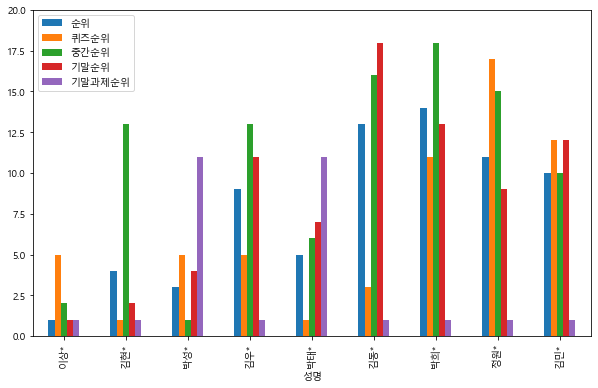

In [152]:
dfr2.plot(figsize=(10, 6), kind='bar')
plt.ylim([0, 20])
plt.show()